Imagine for a moment that you are the minister of education in Cuba.

It is 2019.   The final school exams have just finished, but the results are not
out yet.  Of course you do have the results from 2018.

You are particularly interested in this year's results in Havana, because of
recent problems that you have had with loss of teachers due to emigration.

In order to plan for the year ahead, you need to know if the mathematics
results are holding steady.   But the marking will take time, you won't get
the full results for 2019 for another month.

To help your decision-making, you very much want to get an idea of how good
the results are this year.   Being wise, you decided to take a random sample
of 50 from all the exam papers from Havana this year (2019).  You get them
marked quickly.   But - how much information will this sample give you about
the eventual results for 2019?

In [1]:
import numpy as np
# Make printing of numbers a bit neater.
np.set_printoptions(precision=4, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Here are the
[actual](https://github.com/matthew-brett/datasets/tree/abb224b/havana_exams)
school-leaver mathematics examination results from 2018.

You can download the file from
[havana_math_2018.csv]({{ site.baseurl }}/data/havana_math_2018.csv).

In [2]:
havana_2018 = pd.read_csv('havana_math_2018.csv')
# Drop missing marks.
havana_2018 = havana_2018.dropna()
havana_2018.head()

,school,school_type,id,name,mark
0,2300-VLADIMIR I. LENIN,Institutos Preuniversitarios,92066898,ABREU ALBA DANIELA,99.0
1,2300-VLADIMIR I. LENIN,Institutos Preuniversitarios,51166516,ACEN RAVELO THALIA,98.0
2,2300-VLADIMIR I. LENIN,Institutos Preuniversitarios,121568242,ACOSTA MERIÑO YORDAN CESAR,85.0
3,2300-VLADIMIR I. LENIN,Institutos Preuniversitarios,51975208,AGUADO VALDEZ IRAN DE JESUS,98.0
4,2300-VLADIMIR I. LENIN,Institutos Preuniversitarios,122867542,AGUILAR CESPEDES DANILO,100.0


There are about 7300 marks in this table:

In [3]:
len(havana_2018)

7306

Here is the histogram, split into 100 bins to show more detail of the
distribution --- the default is 10 bins (question --- how would you check
this?).

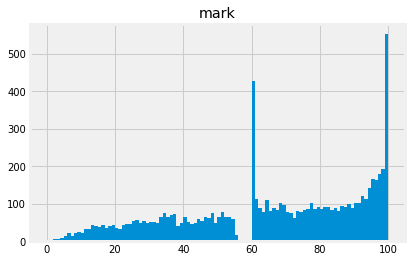

In [4]:
havana_2018.hist('mark', bins=100);

Notice this is much unlike a normal distribution,  In particular, you can see
that the marks near 50% - appear to have been pushed upwards to 60%.  Maybe the
markers are being generous to students close to the pass mark.

Here are the various statistics for the 2018 marks:

In [5]:
havana_2018['mark'].describe()

count    7306.000000
mean       65.256091
std        26.697986
min         0.000000
25%        45.000000
50%        69.000000
75%        90.000000
max       100.000000
Name: mark, dtype: float64

We are particularly interested in the mean.

In [6]:
# Mean mark in 2018.
math_med_2018 = havana_2018['mark'].mean()
math_med_2018

65.25609088420477

Now we look at the sample of 50 exams from 2019 that you marked quickly.

You can download the sample file from
[havana_math_2019_sample.csv]({{ site.baseurl }}/data/havana_math_2019_sample.csv).

In [7]:
havana_2019_sample = pd.read_csv('havana_math_2019_sample.csv')
havana_2019_sample.head()

,school,school_type,id,name,mark
0,2308-JOSE MARTI (H.VIEJA),Institutos Preuniversitarios,1092468439,GONZALEZ CHAO SUANY DE LAS MERCEDES,52.0
1,2304-SAUL DELGADO,Institutos Preuniversitarios,1120268571,LODEIRO CHANG AIMEE,79.0
2,2315-12 DE SEPTIEMBRE,Institutos Preuniversitarios,1112967200,BORREGO CABRERA MIGUEL ANGEL,99.0
3,2323-ROSALIA ABREU,Institutos Preuniversitarios,1110168046,PEREZ MATOS CRISTIAN,88.0
4,2335-RAMON PADRON,Institutos Preuniversitarios,1100267571,MUSA MEDINA IRENE,67.0


In [8]:
len(havana_2019_sample)

50

In [9]:
havana_2019_sample['mark'].describe()

count    50.000000
mean     58.740000
std      22.898899
min       0.000000
25%      40.250000
50%      61.000000
75%      71.750000
max      99.000000
Name: mark, dtype: float64

In [10]:
# Mean mark in 2019 sample.
math_med_2019_samp = havana_2019_sample['mark'].mean()
math_med_2019_samp

58.74

The mean here is 58.74.  That seems a bit lower than the 2018 mean --- but have
I been deceived by the sample?  Was I just unlucky?   How confident can I be
that the mean from the full results will in fact be near 58.74, rather than the
65.25 or so of the previous year?

We now enter the territory of *confidence intervals*.

My question is: how close is my *sample mean* of 58.74 likely to be to the
eventual mean, once I have all 7000 or so results for 2019?  How *confident*
can I be in this sample mean of around 58.74?